In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

#전국 전력거래량 파일 불러오기(https://www.data.go.kr/data/15133498/fileData.do)
data='electricity trading volume.csv'
df_elec=pd.read_csv(data)
df_elec.head()

,거래일자,거래시간,지역,전력거래량(MWh)
0,2023-01-01,1,경기도,8547
1,2023-01-01,2,경기도,8450
2,2023-01-01,3,경기도,8333
3,2023-01-01,4,경기도,8675
4,2023-01-01,5,경기도,8990


In [64]:
# 서울 지역 데이터 필터링
seoul_data = df_elec[df_elec['지역'] == '서울시']

# 거래일자별 전력거래량 합산
daily_total = seoul_data.groupby('거래일자')['전력거래량(MWh)'].sum().reset_index()

# 컬럼 이름 변경
daily_total.rename(columns={'전력거래량(MWh)': '일간 전력거래량(MWh)'}, inplace=True)
daily_total.rename(columns={'거래일자': '일시'}, inplace=True)

# 결과 출력
daily_total

,일시,일간 전력거래량(MWh)
0,2023-01-01,17560
1,2023-01-02,17868
2,2023-01-03,18430
3,2023-01-04,18282
4,2023-01-05,18508
...,...,...
360,2023-12-27,11164
361,2023-12-28,10589
362,2023-12-29,11277
363,2023-12-30,11438


In [65]:
#서울시 날씨 데이터 불러오기(https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36)
data='weather.csv'
df=pd.read_csv(data)
df.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%)
0,108,서울,2023-01-01,-0.2,NaN,2.7,54.5
1,108,서울,2023-01-02,-4.5,NaN,2.5,45.9
2,108,서울,2023-01-03,-5.0,NaN,1.8,49.0
3,108,서울,2023-01-04,-1.8,NaN,1.9,51.4
4,108,서울,2023-01-05,-1.6,NaN,1.6,58.1


In [66]:
# 날씨 데이터프레임에 병합
df = pd.merge(df, daily_total, on='일시', how='left')

# 결과 확인
df.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh)
0,108,서울,2023-01-01,-0.2,NaN,2.7,54.5,17560
1,108,서울,2023-01-02,-4.5,NaN,2.5,45.9,17868
2,108,서울,2023-01-03,-5.0,NaN,1.8,49.0,18430
3,108,서울,2023-01-04,-1.8,NaN,1.9,51.4,18282
4,108,서울,2023-01-05,-1.6,NaN,1.6,58.1,18508


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             365 non-null    int64  
 1   지점명            365 non-null    object 
 2   일시             365 non-null    object 
 3   평균기온(°C)       365 non-null    float64
 4   일강수량(mm)       150 non-null    float64
 5   평균 풍속(m/s)     363 non-null    float64
 6   평균 상대습도(%)     365 non-null    float64
 7   일간 전력거래량(MWh)  365 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 22.9+ KB


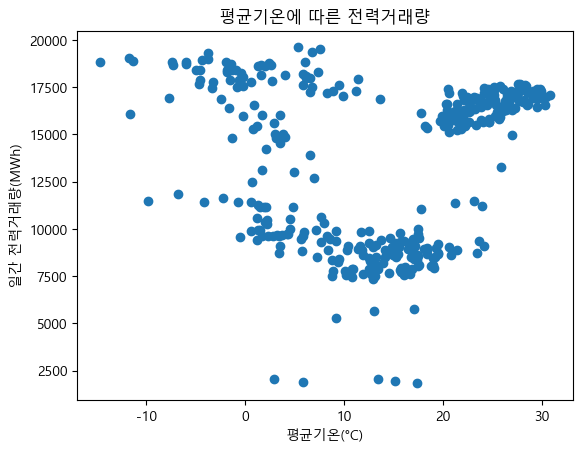

In [68]:
plt.rcParams['axes.unicode_minus'] = False # 마이너스(-) 기호가 깨지는 문제 해결

plt.scatter(df['평균기온(°C)'],df['일간 전력거래량(MWh)'])
plt.title('평균기온에 따른 전력거래량')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [69]:
# '일시' 컬럼을 datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# 월(month) 추출
df['월'] = df['일시'].dt.month

# 계절별 데이터프레임 생성
df_spring = df[df['월'].isin([3, 4, 5])]  # 봄 (3, 4, 5월)
df_summer = df[df['월'].isin([6, 7, 8])]  # 여름 (6, 7, 8월)
df_fall = df[df['월'].isin([9, 10, 11])]  # 가을 (9, 10, 11월)
df_winter = df[df['월'].isin([12, 1, 2])]  # 겨울 (12, 1, 2월)

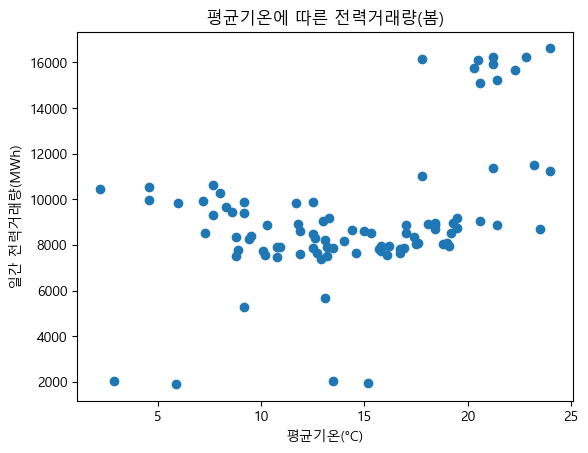

In [70]:
#봄
plt.scatter(df_spring['평균기온(°C)'],df_spring['일간 전력거래량(MWh)'])
plt.title('평균기온에 따른 전력거래량(봄)')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

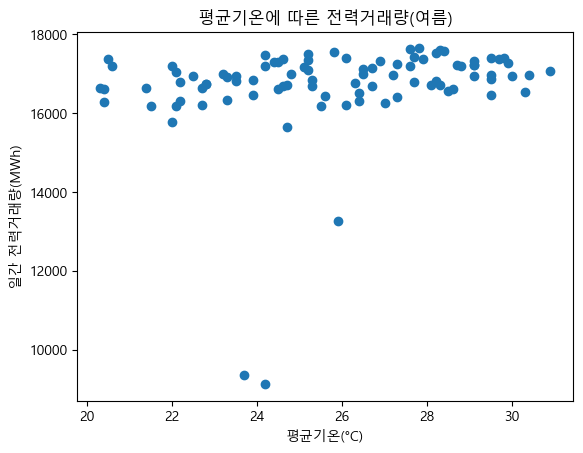

In [71]:
#여름
plt.scatter(df_summer['평균기온(°C)'],df_summer['일간 전력거래량(MWh)'])
plt.title('평균기온에 따른 전력거래량(여름)')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [72]:
formula='Q("일간 전력거래량(MWh)") ~ Q("평균기온(°C)")'
result = smf.ols(formula, df_summer).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.734
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0564
Time:                        22:13:03   Log-Likelihood:                -784.79
No. Observations:                  92   AIC:                             1574.
Df Residuals:                      90   BIC:                             1579.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.439e+04   1206.403     11.925

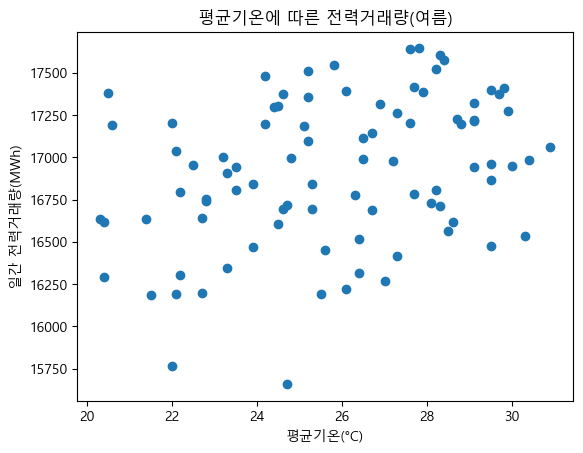

In [73]:
#여름
df_summer2 = df_summer[df_summer['일간 전력거래량(MWh)'] >= 14000]#이상치 제거

plt.scatter(df_summer2['평균기온(°C)'],df_summer2['일간 전력거래량(MWh)'])
plt.title('평균기온에 따른 전력거래량(여름)')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [74]:
formula='Q("일간 전력거래량(MWh)") ~ Q("평균기온(°C)")'
result = smf.ols(formula, df_summer2).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     10.81
Date:                Sun, 08 Dec 2024   Prob (F-statistic):            0.00146
Time:                        22:13:05   Log-Likelihood:                -661.71
No. Observations:                  89   AIC:                             1327.
Df Residuals:                      87   BIC:                             1332.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.558e+04    406.303     38.354

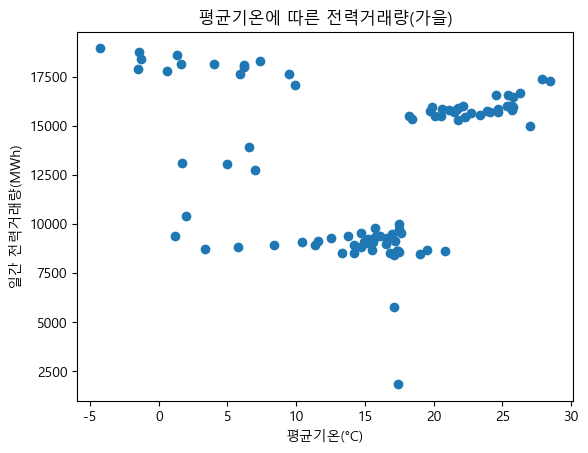

In [75]:
#가을
plt.scatter(df_fall['평균기온(°C)'],df_fall['일간 전력거래량(MWh)'])
plt.title('평균기온에 따른 전력거래량(가을)')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

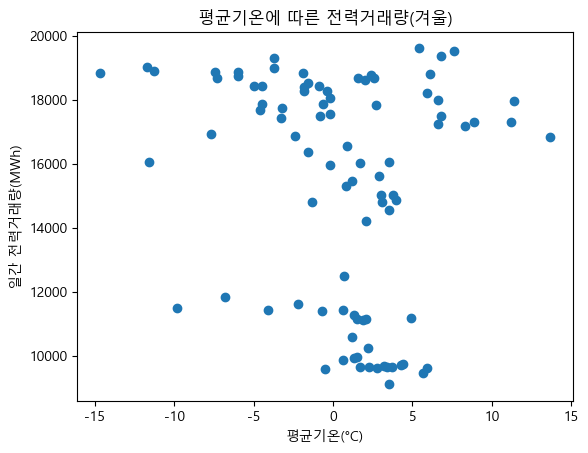

In [76]:
#겨울
plt.scatter(df_winter['평균기온(°C)'],df_winter['일간 전력거래량(MWh)'])
plt.title('평균기온에 따른 전력거래량(겨울)')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [77]:
#생각해보니까 계절이 아니라 기온별로 묶는게 맞는 것 같음
#더 생각해보니 다항 회귀를 적용해보는게 좋을 것 같음
# 2차 다항 회귀 모델 공식
df['평균기온2'] = df['평균기온(°C)'] ** 2
formula = 'Q("일간 전력거래량(MWh)") ~ Q("평균기온(°C)") + Q("평균기온2")'
result_poly = smf.ols(formula, data=df).fit()

# 결과 요약 출력
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.11e-37
Time:                        22:13:09   Log-Likelihood:                -3480.4
No. Observations:                 365   AIC:                             6967.
Df Residuals:                     362   BIC:                             6978.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.371e+04    298.371     45.952

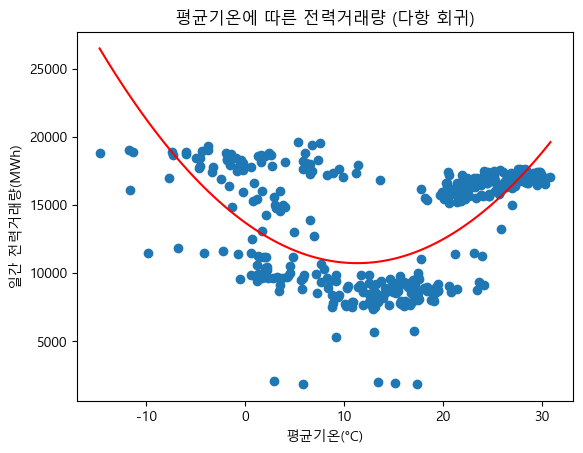

In [78]:
# 회귀 곡선을 산점도에 추가
plt.scatter(df['평균기온(°C)'], df['일간 전력거래량(MWh)'])
values = np.linspace(df['평균기온(°C)'].min(), df['평균기온(°C)'].max(), 100)  # BMI 범위의 값 생성
waist_predictions = 1.371e+04 -527.0101 * values + 23.2281* values**2   # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가
plt.title('평균기온에 따른 전력거래량 (다항 회귀)')
plt.xlabel('평균기온(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [79]:
#전력량은 수요가 적을 때를 예측하는것 보다 많을 때를 예측하는게 더 중요하다고 생각(정전위험)
#양 끝단(추울 때와 더울 떄)에 집중하기로 함
#우리가 춥다, 덥다를 가장 나타내는 지표가 무엇일까? -> 체감온도
#체감온도로 묶어보자(기상청의 체감온도 데이터 활용 https://data.kma.go.kr/climate/windChill/selectWindChillChart.do)
#겨울철 체감온도 파일 불러오기
data='겨울철 체감온도.csv'
df_wintemp=pd.read_csv(data)
df_wintemp

,일시,기온(°C),풍속(km/h),체감온도(°C)
0,2023-01-01,-2.4,18.7,-8.1
1,2023-01-02,-6.7,11.9,-11.9
2,2023-01-03,-8.8,7.9,-13.0
3,2023-01-04,-5.7,7.2,-9.1
4,2023-01-05,-5.6,9.0,-9.7
...,...,...,...,...
194,2023-12-27,-2.7,8.6,-6.1
195,2023-12-28,-1.7,4.7,-3.4
196,2023-12-29,-1.5,8.6,-4.7
197,2023-12-30,-0.8,9.7,-4.2


In [80]:
# '일자' 컬럼을 datetime 형식으로 변환
df_wintemp['일시'] = pd.to_datetime(df_wintemp['일시'])
wintemp=df_wintemp[['일시','체감온도(°C)']]
df_copy=df
#일시를 기준으로 병합
df_copy = pd.merge(df_copy, wintemp, on='일시', how='left')
df_copy.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh),월,평균기온2,체감온도(°C)
0,108,서울,2023-01-01,-0.2,NaN,2.7,54.5,17560,1,0.04,-8.1
1,108,서울,2023-01-02,-4.5,NaN,2.5,45.9,17868,1,20.25,-11.9
2,108,서울,2023-01-03,-5.0,NaN,1.8,49.0,18430,1,25.00,-13.0
3,108,서울,2023-01-04,-1.8,NaN,1.9,51.4,18282,1,3.24,-9.1
4,108,서울,2023-01-05,-1.6,NaN,1.6,58.1,18508,1,2.56,-9.7


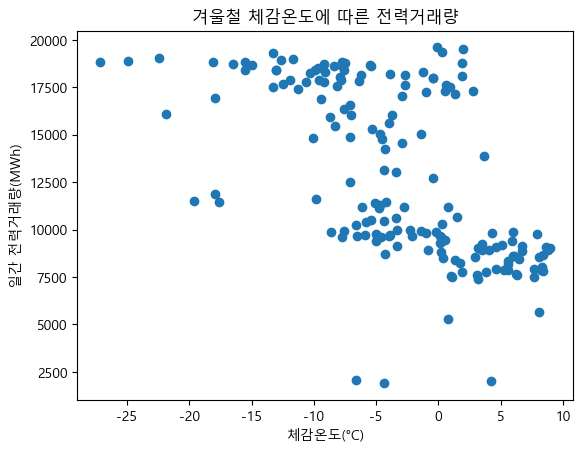

In [81]:
plt.scatter(df_copy['체감온도(°C)'],df_copy['일간 전력거래량(MWh)'])
plt.title('겨울철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [82]:
formula='Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")'
result = smf.ols(formula, df_copy).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     94.15
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.95e-18
Time:                        22:13:14   Log-Likelihood:                -1633.5
No. Observations:                 170   AIC:                             3271.
Df Residuals:                     168   BIC:                             3277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.163e+04    304.010     38.243

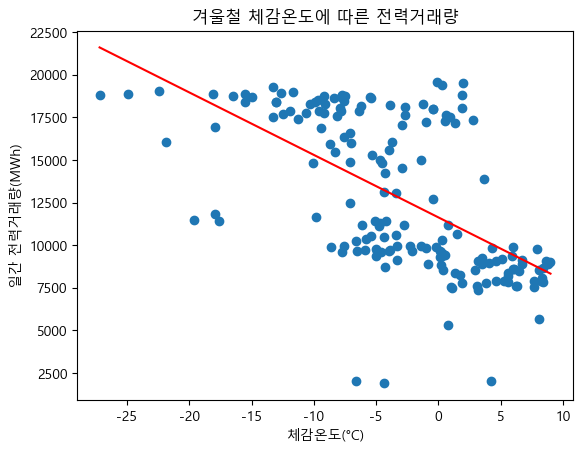

In [83]:
plt.scatter(df_copy['체감온도(°C)'], df_copy['일간 전력거래량(MWh)'])
values = np.linspace(df_copy['체감온도(°C)'].min(), df_copy['체감온도(°C)'].max(), 100)  # BMI 범위의 값 생성
waist_predictions = 1.163e+04 -366.6868 * values   # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가
plt.title('겨울철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [84]:
#겨울철 체감온도는 다항회귀 적용이 필요할듯
# 2차 다항 회귀 모델 공식
df_copy['체감온도2'] = df_copy['체감온도(°C)'] ** 2
formula = 'Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)") + Q("체감온도2")'
result_poly = smf.ols(formula, data=df_copy).fit()

# 결과 요약 출력
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     50.04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           9.35e-18
Time:                        22:13:16   Log-Likelihood:                -1631.4
No. Observations:                 170   AIC:                             3269.
Df Residuals:                     167   BIC:                             3278.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.185e+04    320.921     36.932

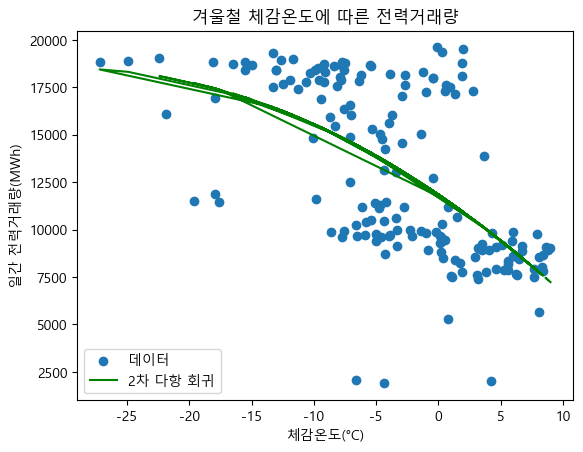

In [85]:
# 회귀 곡선을 산점도에 추가
plt.scatter(df_copy['체감온도(°C)'], df_copy['일간 전력거래량(MWh)'], label="데이터")
plt.plot(df_copy['체감온도(°C)'], result_poly.predict(df_copy), color='green', label="2차 다항 회귀")
plt.title('겨울철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.legend()
plt.show()

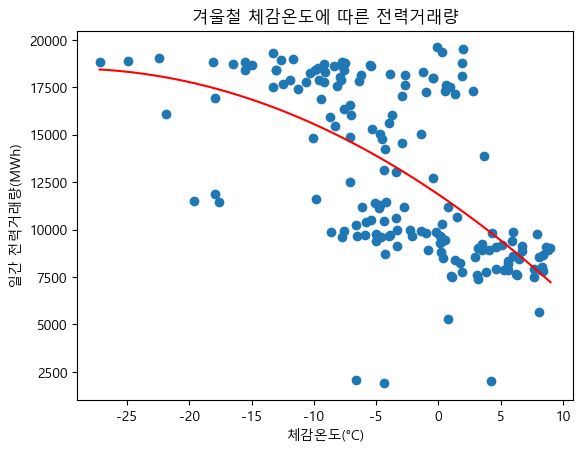

In [86]:
plt.scatter(df_copy['체감온도(°C)'], df_copy['일간 전력거래량(MWh)'])
values = np.linspace(df_copy['체감온도(°C)'].min(), df_copy['체감온도(°C)'].max(), 100)  # 범위의 값 생성
waist_predictions = 1.185e+04 -446.3377 * values -7.5023* values**2   # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가
plt.title('겨울철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [87]:
#주말을 제외한 겨울철 체감 온도에 따른 전력 거래량

# 요일 정보 추가 (월=0, 화=1, ..., 일=6)
df_copy['요일'] = df_copy['일시'].dt.weekday

# 주말 제외 (요일이 5(토), 6(일)이 아닌 데이터만 선택)
filtered_df = df_copy[df_copy['요일'] < 5]

# 결과 출력
filtered_df.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh),월,평균기온2,체감온도(°C),체감온도2,요일
1,108,서울,2023-01-02,-4.5,NaN,2.5,45.9,17868,1,20.25,-11.9,141.61,0
2,108,서울,2023-01-03,-5.0,NaN,1.8,49.0,18430,1,25.00,-13.0,169.00,1
3,108,서울,2023-01-04,-1.8,NaN,1.9,51.4,18282,1,3.24,-9.1,82.81,2
4,108,서울,2023-01-05,-1.6,NaN,1.6,58.1,18508,1,2.56,-9.7,94.09,3
5,108,서울,2023-01-06,0.6,3.9,2.2,71.9,9875,1,0.36,-8.6,73.96,4


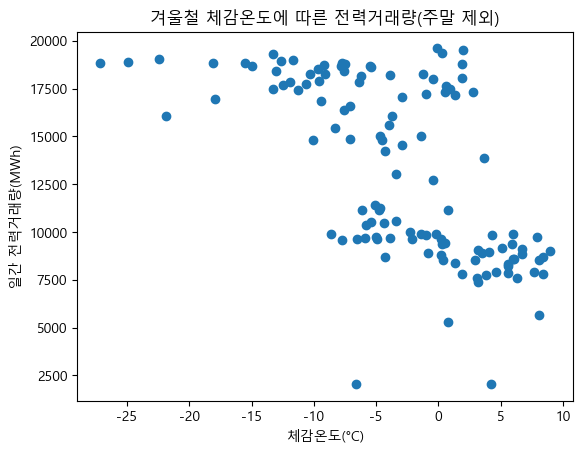

In [88]:
plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
plt.title('겨울철 체감온도에 따른 전력거래량(주말 제외)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [89]:
# 2차 다항 회귀 모델 공식
formula = 'Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)") + Q("체감온도2")'
result_poly = smf.ols(formula, data=filtered_df).fit()

# 결과 요약 출력
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     39.43
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.69e-14
Time:                        22:13:25   Log-Likelihood:                -1160.7
No. Observations:                 121   AIC:                             2327.
Df Residuals:                     118   BIC:                             2336.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.217e+04    374.387     32.512

In [90]:
# 1차 다항 회귀 모델 공식
formula = 'Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")'
result_poly = smf.ols(formula, data=filtered_df).fit()

# 결과 요약 출력
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     74.17
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.53e-14
Time:                        22:13:27   Log-Likelihood:                -1162.4
No. Observations:                 121   AIC:                             2329.
Df Residuals:                     119   BIC:                             2334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.196e+04    358.518     33.353

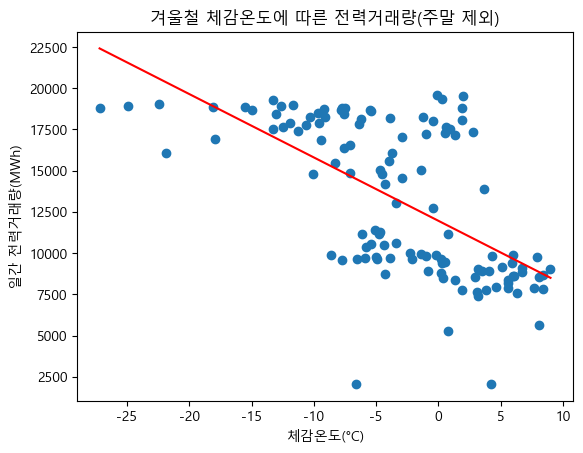

In [91]:
plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
values = np.linspace(filtered_df['체감온도(°C)'].min(), filtered_df['체감온도(°C)'].max(), 100)  # 범위의 값 생성
waist_predictions = 1.196e+04 -384.4815 * values   # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가
plt.title('겨울철 체감온도에 따른 전력거래량(주말 제외)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [92]:
#그럼 주말만 보면 어떨까?
# 주말(요일이 5(토), 6(일))데이터만 선택
filtered_df = df_copy[df_copy['요일'] >= 5]

# 결과 출력
filtered_df.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh),월,평균기온2,체감온도(°C),체감온도2,요일
0,108,서울,2023-01-01,-0.2,NaN,2.7,54.5,17560,1,0.04,-8.1,65.61,6
6,108,서울,2023-01-07,1.5,0.1,2.2,80.9,9954,1,2.25,-3.3,10.89,5
7,108,서울,2023-01-08,1.3,NaN,1.7,69.3,9942,1,1.69,-7.6,57.76,6
13,108,서울,2023-01-14,6.6,1.6,2.5,92.9,17993,1,43.56,-0.4,0.16,5
14,108,서울,2023-01-15,-0.2,3.2,2.8,93.9,18048,1,0.04,-7.9,62.41,6


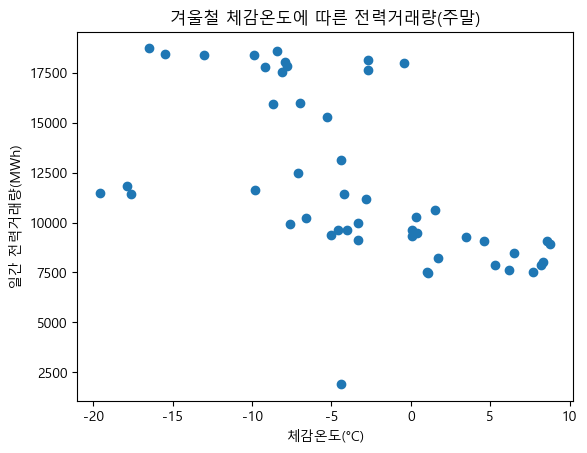

In [93]:
plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
plt.title('겨울철 체감온도에 따른 전력거래량(주말)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

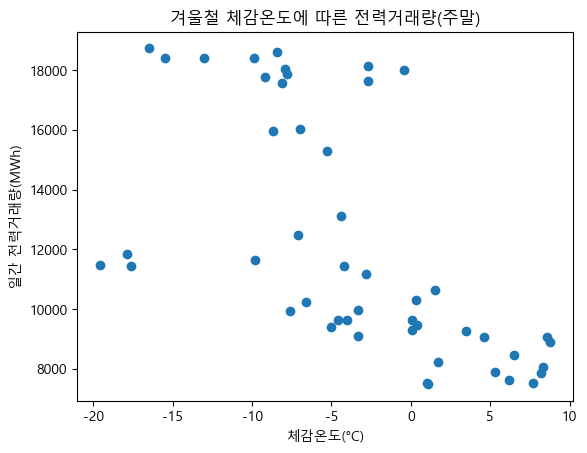

In [94]:
filtered_df = filtered_df[filtered_df['일간 전력거래량(MWh)'] > 7000]#이상치 제거

plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
plt.title('겨울철 체감온도에 따른 전력거래량(주말)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [95]:
# 1차 다항 회귀 모델 공식
formula = 'Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")'
result_poly = smf.ols(formula, data=filtered_df).fit()

# 결과 요약 출력
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     28.28
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.00e-06
Time:                        22:13:37   Log-Likelihood:                -454.12
No. Observations:                  48   AIC:                             912.2
Df Residuals:                      46   BIC:                             916.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.101e+04    506.988     21.712

In [96]:
# 2차 다항 회귀 모델 공식
formula = 'Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)") + Q("체감온도2")'
result_poly = smf.ols(formula, data=filtered_df).fit()

# 결과 요약 출력
print(result_poly.summary()) #2차 유의 수준이 0.05보다 높기 때문에 귀무가설 채택

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     16.72
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.72e-06
Time:                        22:13:39   Log-Likelihood:                -452.29
No. Observations:                  48   AIC:                             910.6
Df Residuals:                      45   BIC:                             916.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.149e+04    554.671     20.709

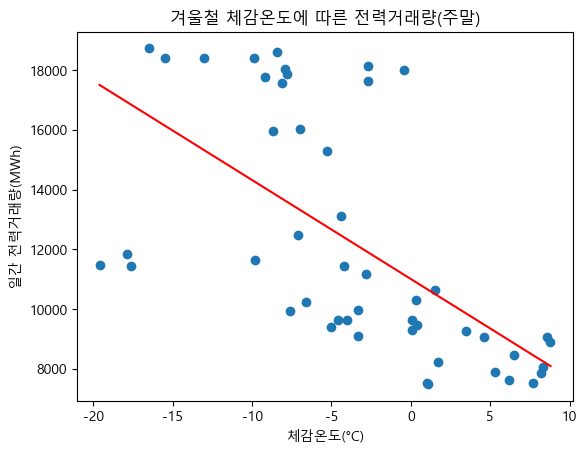

In [97]:
plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
values = np.linspace(filtered_df['체감온도(°C)'].min(), filtered_df['체감온도(°C)'].max(), 100)  # 범위의 값 생성
waist_predictions = 1.101e+04 -331.3372 * values   # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가
plt.title('겨울철 체감온도에 따른 전력거래량(주말)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [98]:
#여름철 체감온도 파일 불러오기
data='여름철 체감온도.csv'
df_sumtemp=pd.read_csv(data)
# '일자' 컬럼을 datetime 형식으로 변환
df_sumtemp['일시'] = pd.to_datetime(df_sumtemp['일시'])
sumtemp=df_sumtemp[['일시','체감온도(°C)']]
df_copy=df
#일시를 기준으로 병합
df_copy = pd.merge(df_copy, sumtemp, on='일시', how='left')
df_copy.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh),월,평균기온2,체감온도(°C)
0,108,서울,2023-01-01,-0.2,NaN,2.7,54.5,17560,1,0.04,NaN
1,108,서울,2023-01-02,-4.5,NaN,2.5,45.9,17868,1,20.25,NaN
2,108,서울,2023-01-03,-5.0,NaN,1.8,49.0,18430,1,25.00,NaN
3,108,서울,2023-01-04,-1.8,NaN,1.9,51.4,18282,1,3.24,NaN
4,108,서울,2023-01-05,-1.6,NaN,1.6,58.1,18508,1,2.56,NaN


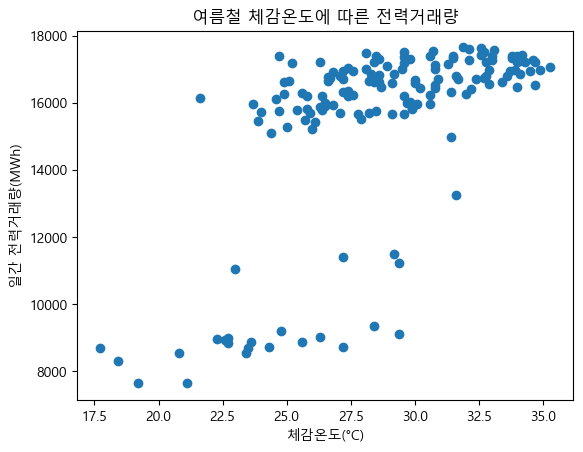

In [99]:
plt.scatter(df_copy['체감온도(°C)'],df_copy['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

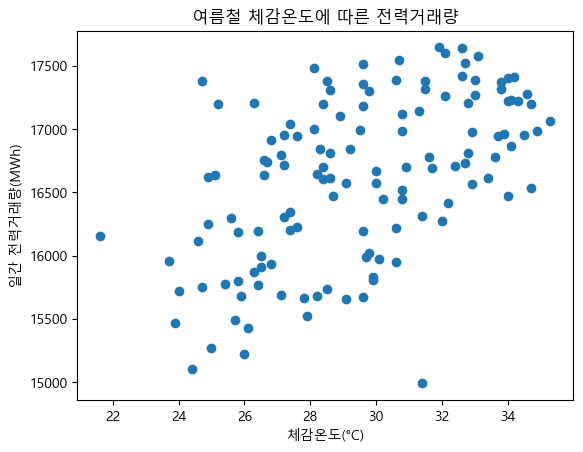

In [100]:
df_copy = df_copy[df_copy['일간 전력거래량(MWh)'] >= 14000]#이상치 제거

plt.scatter(df_copy['체감온도(°C)'],df_copy['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [101]:
formula='Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")'
result = smf.ols(formula, df_copy).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     50.63
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.25e-11
Time:                        22:13:54   Log-Likelihood:                -995.80
No. Observations:                 129   AIC:                             1996.
Df Residuals:                     127   BIC:                             2001.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.336e+04    458.441     29.148

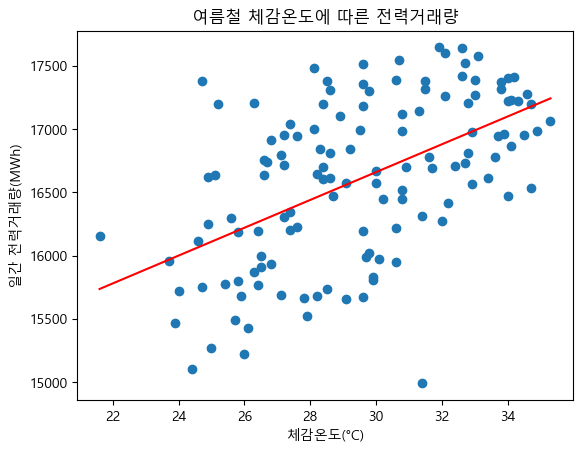

In [102]:
# 회귀선 추가
values = np.linspace(df_copy['체감온도(°C)'].min(), df_copy['체감온도(°C)'].max(), 100)  # 체감온도(°C) 범위의 값 생성
waist_predictions = 1.336e+04 + 109.9781 * values  # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가

plt.scatter(df_copy['체감온도(°C)'],df_copy['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [103]:
# 2차 다항 회귀 모델 공식
df_copy['체감온도2'] = df_copy['체감온도(°C)'] ** 2
formula = 'Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)") + Q("체감온도2")'
result_poly = smf.ols(formula, data=df_copy).fit()

# 결과 요약 출력
print(result_poly.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     25.20
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           6.24e-10
Time:                        22:14:13   Log-Likelihood:                -995.74
No. Observations:                 129   AIC:                             1997.
Df Residuals:                     126   BIC:                             2006.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.198e+04   4141.837      2.892

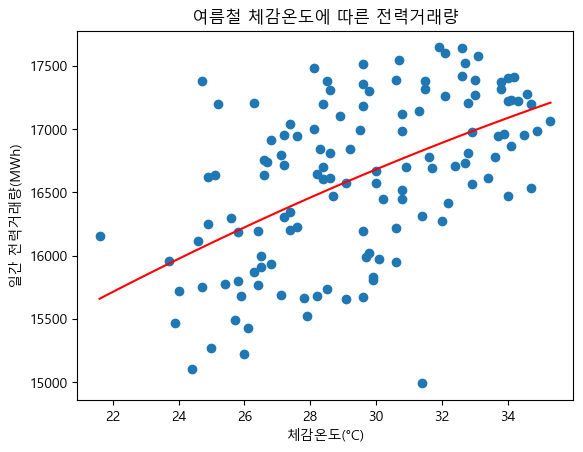

In [105]:
# 회귀선 추가
values = np.linspace(df_copy['체감온도(°C)'].min(), df_copy['체감온도(°C)'].max(), 100)  # 체감온도(°C) 범위의 값 생성
waist_predictions = 1.198e+04 + 205.2524 * values  -1.6186 * values**2  # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가

plt.scatter(df_copy['체감온도(°C)'],df_copy['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [65]:
#여름도 주말데이터와 평일데이터를 분리해보자
# 요일 정보 추가 (월=0, 화=1, ..., 일=6)
df_copy['요일'] = df_copy['일시'].dt.weekday

# 주말 제외 (요일이 5(토), 6(일)이 아닌 데이터만 선택)
filtered_df = df_copy[df_copy['요일'] < 5]

# 결과 출력
filtered_df.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh),월,평균기온2,체감온도(°C),요일
1,108,서울,2023-01-02,-4.5,NaN,2.5,45.9,17868,1,20.25,NaN,0
2,108,서울,2023-01-03,-5.0,NaN,1.8,49.0,18430,1,25.00,NaN,1
3,108,서울,2023-01-04,-1.8,NaN,1.9,51.4,18282,1,3.24,NaN,2
4,108,서울,2023-01-05,-1.6,NaN,1.6,58.1,18508,1,2.56,NaN,3
8,108,서울,2023-01-09,3.1,NaN,2.3,60.1,14795,1,9.61,NaN,0


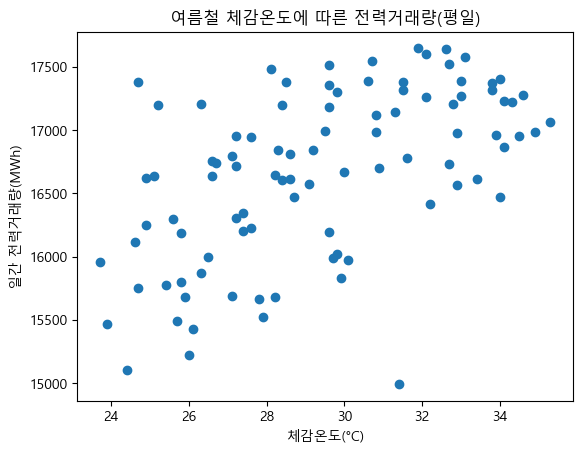

In [66]:
plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량(평일)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [67]:
formula='Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")'
result = smf.ols(formula, filtered_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     40.64
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           7.19e-09
Time:                        23:06:41   Log-Likelihood:                -726.84
No. Observations:                  94   AIC:                             1458.
Df Residuals:                      92   BIC:                             1463.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.32e+04    545.285     24.211

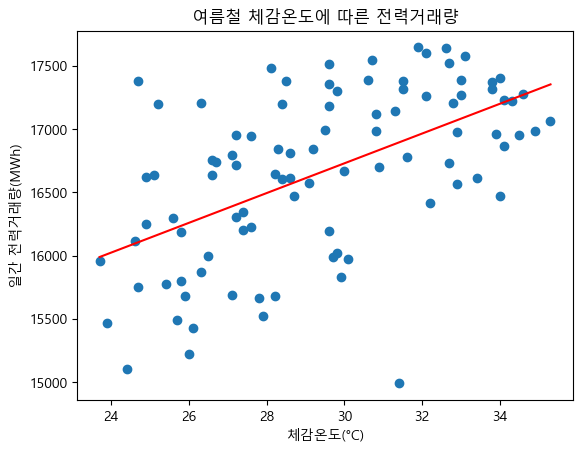

In [68]:
# 회귀선 추가
values = np.linspace(filtered_df['체감온도(°C)'].min(), filtered_df['체감온도(°C)'].max(), 100)  # 체감온도(°C) 범위의 값 생성
waist_predictions =1.32e+04 + 117.6409 * values  # 회귀식 적용
plt.plot(values, waist_predictions, color='red')  # 직선 추가

plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

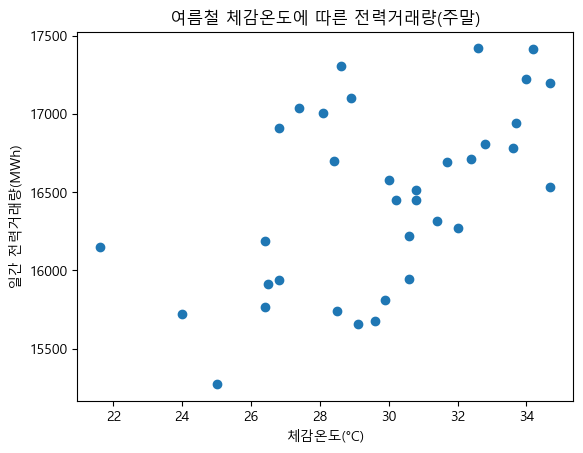

In [69]:
# 주말
filtered_df = df_copy[df_copy['요일'] >= 5]

plt.scatter(filtered_df['체감온도(°C)'],filtered_df['일간 전력거래량(MWh)'])
plt.title('여름철 체감온도에 따른 전력거래량(주말)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.show()

In [70]:
formula='Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")'
result = smf.ols(formula, filtered_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     13.10
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000977
Time:                        23:18:53   Log-Likelihood:                -265.85
No. Observations:                  35   AIC:                             535.7
Df Residuals:                      33   BIC:                             538.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.358e+04    801.140     16.955

In [71]:
#여름은 비가 오느냐에 따라 전력거래량이 다를까?
#일단 일강수랑(mm)가 Nan일 때, 0입력
df_copy['일강수량(mm)'] = df_copy['일강수량(mm)'].fillna(0)

df_copy.head()

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),일간 전력거래량(MWh),월,평균기온2,체감온도(°C),요일
0,108,서울,2023-01-01,-0.2,0.0,2.7,54.5,17560,1,0.04,NaN,6
1,108,서울,2023-01-02,-4.5,0.0,2.5,45.9,17868,1,20.25,NaN,0
2,108,서울,2023-01-03,-5.0,0.0,1.8,49.0,18430,1,25.00,NaN,1
3,108,서울,2023-01-04,-1.8,0.0,1.9,51.4,18282,1,3.24,NaN,2
4,108,서울,2023-01-05,-1.6,0.0,1.6,58.1,18508,1,2.56,NaN,3


In [72]:
formula='Q("일간 전력거래량(MWh)") ~ Q("체감온도(°C)")+Q("일강수량(mm)")'
result = smf.ols(formula, df_copy).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("일간 전력거래량(MWh)")   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     33.60
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.02e-12
Time:                        23:26:05   Log-Likelihood:                -989.87
No. Observations:                 129   AIC:                             1986.
Df Residuals:                     126   BIC:                             1994.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.308e+04    446.841     29.280

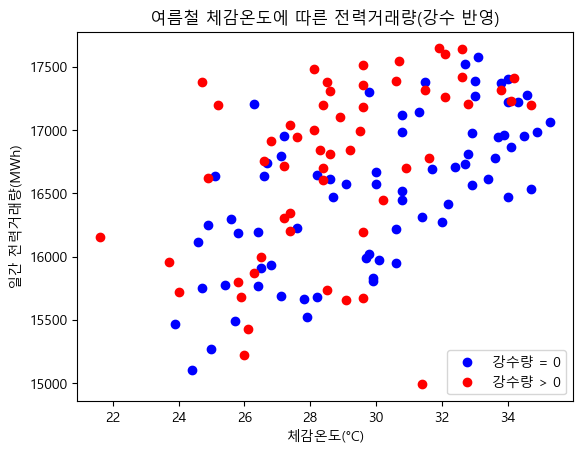

In [76]:
# 조건에 따른 색상 분리
rain_data = df_copy[df_copy['일강수량(mm)'] > 0]  # 강수량이 0 이상인 데이터
no_rain_data = df_copy[df_copy['일강수량(mm)'] == 0]  # 강수량이 0인 데이터

# 산점도 그리기
plt.scatter(no_rain_data['체감온도(°C)'], no_rain_data['일간 전력거래량(MWh)'], color='blue', label='강수량 = 0')
plt.scatter(rain_data['체감온도(°C)'], rain_data['일간 전력거래량(MWh)'], color='red', label='강수량 > 0')

# 그래프 꾸미기
plt.title('여름철 체감온도에 따른 전력거래량(강수 반영)')
plt.xlabel('체감온도(°C)')
plt.ylabel('일간 전력거래량(MWh)')
plt.legend()  # 범례 추가
plt.show()